# Losses Over Time

In [2]:
import autorootcwd
import json
import matplotlib.pyplot as plt
import os

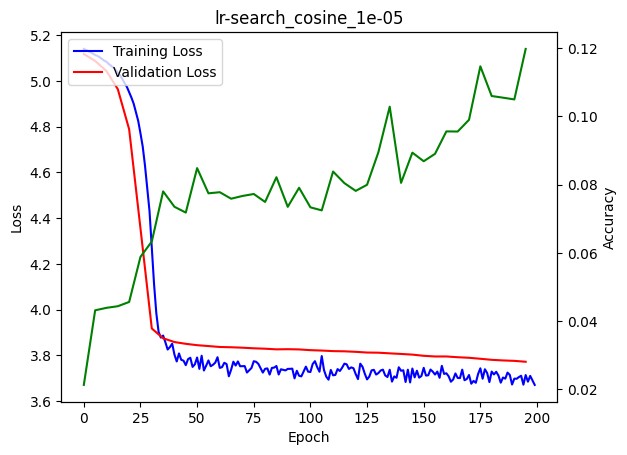

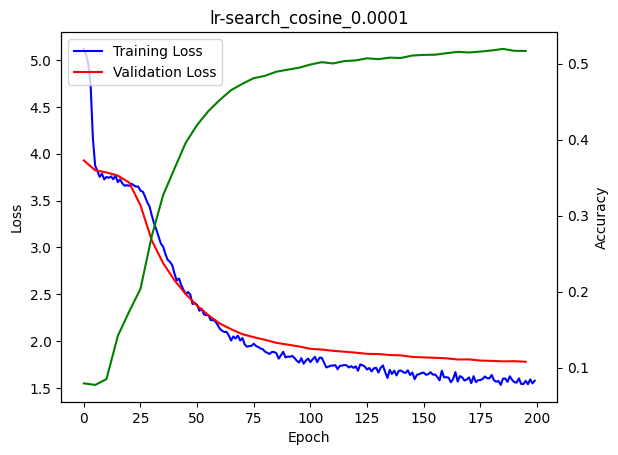

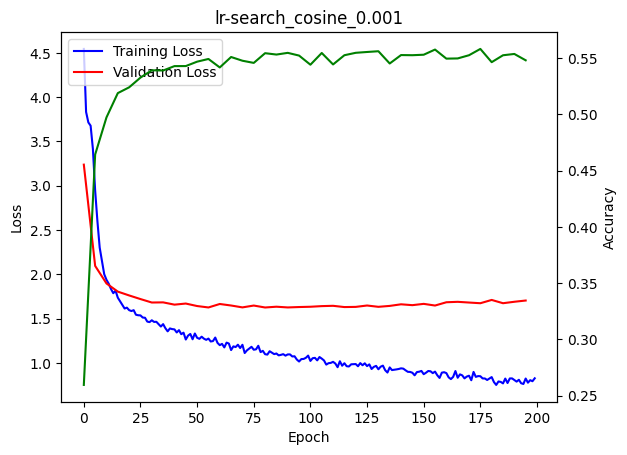

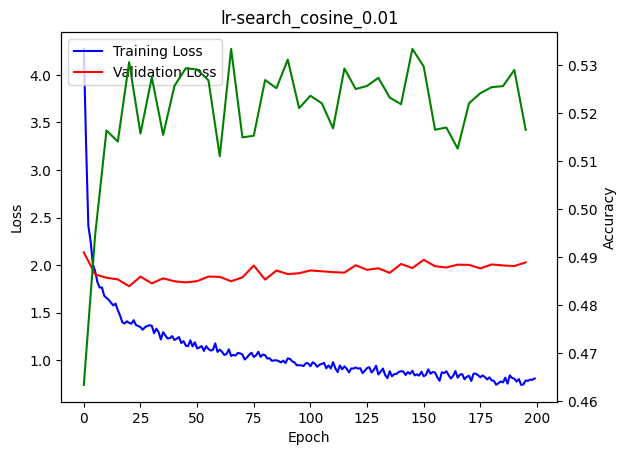

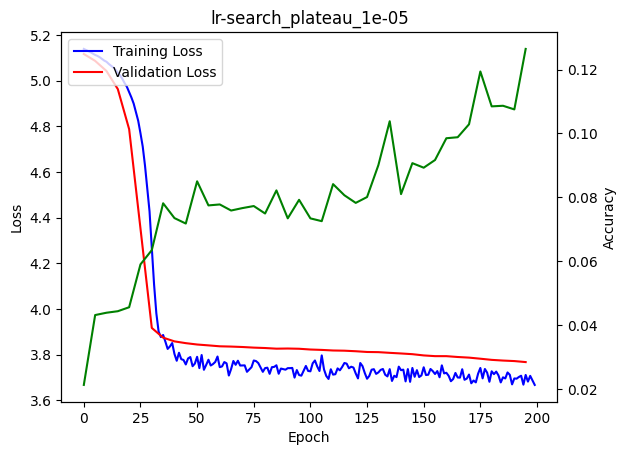

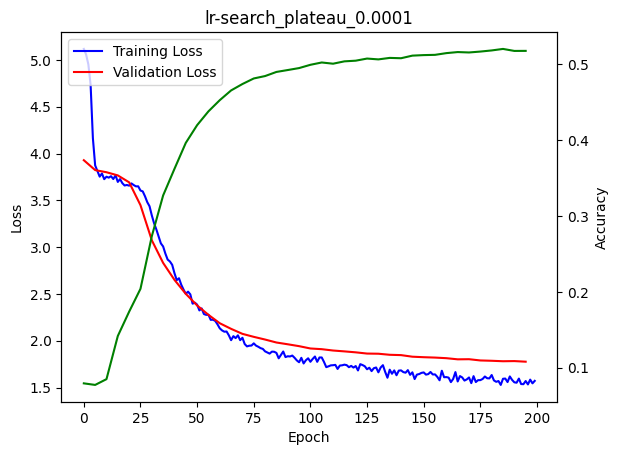

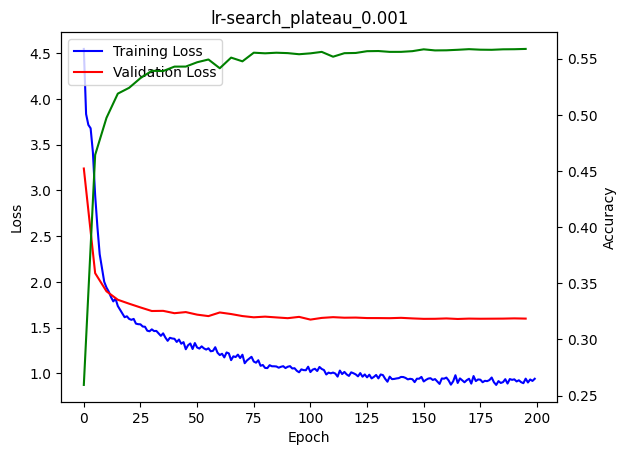

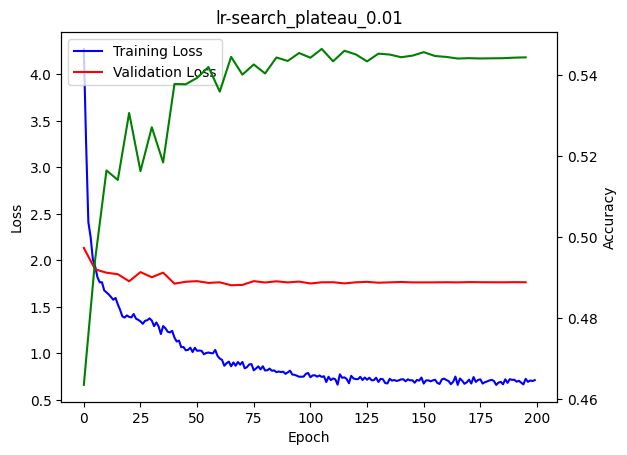

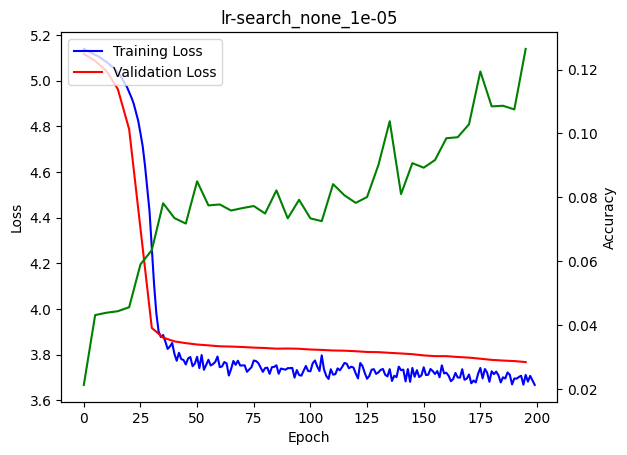

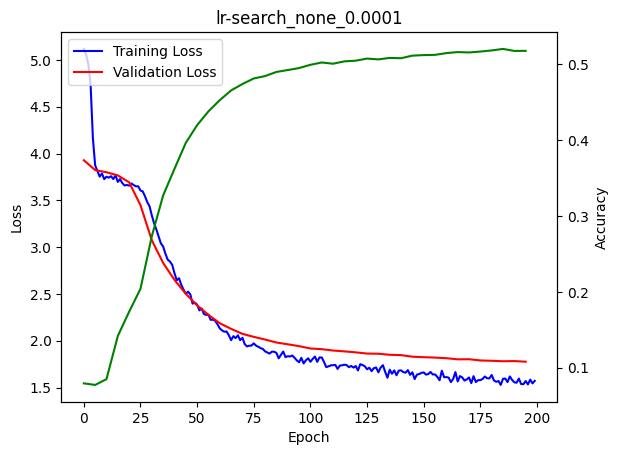

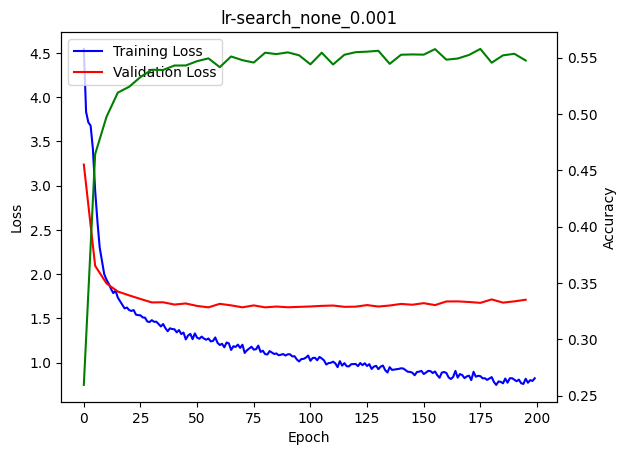

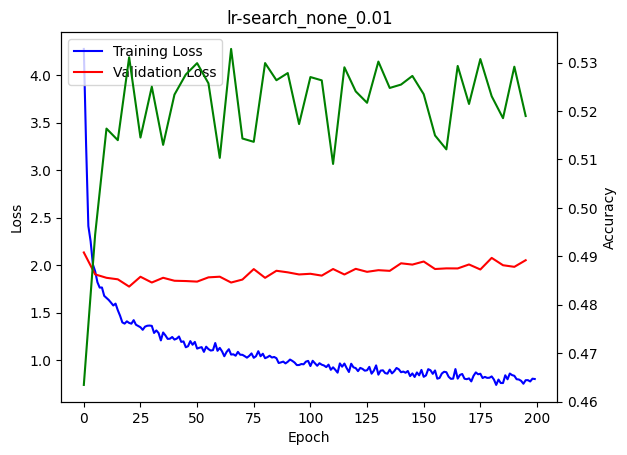

In [8]:
# Loop over directory of experiments
experiments = os.listdir('./experiments')
for lr_scheduler in ['cosine', 'plateau', 'none']:
    for lr in [1e-5, 0.0001, 0.001, 0.01]:
        exp = f'lr-search_{lr_scheduler}_{lr}'
        training_history = json.load(open(f'./experiments/{exp}/training_history.json'))
        train_losses = training_history['train_losses']
        val_losses = training_history['val_losses']
        val_accuracies = training_history['val_accuracies']
        # Plot all 3, with acc having its own y-axis
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(train_losses, label='Training Loss', color='blue')
        # Multiply validations by 5 as they were only recorded every 5 epochs
        ax1.plot([5 * i for i in range(len(val_losses))], val_losses, label='Validation Loss', color='red')
        ax2.plot([5 * i for i in range(len(val_accuracies))], val_accuracies, label='Validation Accuracy', color='green')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax2.set_ylabel('Accuracy')
        ax1.legend(loc='upper left')
        plt.title(f'{exp}')